In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data = pd.read_csv("C:\\Users\\danie\\OneDrive\\Área de Trabalho\\Python BRAIN\\Repotório github\\Teste\\Desafios\\Houses\\data\\housing.csv")

In [3]:
# nulos_por_coluna = house_data.isnull().sum()
# print(nulos_por_coluna)

# column_names = house_data.columns.tolist()
# print(column_names)

In [4]:
media = house_data["total_bedrooms"].mean()
house_data["total_bedrooms"].fillna(media, inplace=True)

nulos_por_coluna = house_data.isnull().sum()
print(nulos_por_coluna)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_29800\3641944216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_data["total_bedrooms"].fillna(media, inplace=True)


In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(house_data, test_size=0.2, random_state=42)

<Axes: >

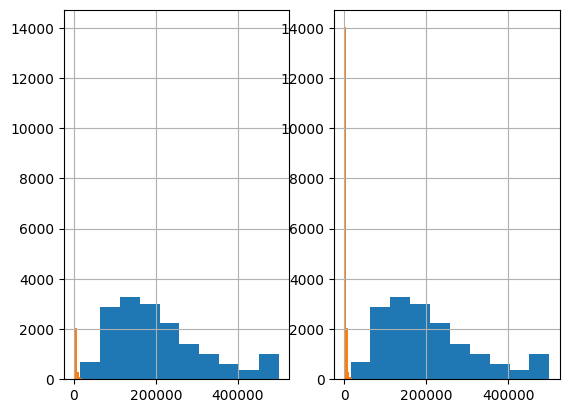

In [6]:
plt.subplot(1,2,1)
train_set['median_house_value'].hist()
train_set['total_rooms'].hist()

plt.subplot(1,2,2)
train_set['median_house_value'].hist()
train_set['total_rooms'].hist()


In [7]:
import pandas as pd

column_data = house_data['ocean_proximity']

string_values = [val for val in column_data if isinstance(val, str)]

unique_string_values = set(string_values)

print(unique_string_values)


{'NEAR OCEAN', 'ISLAND', 'NEAR BAY', 'INLAND', '<1H OCEAN'}


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         coding = OneHotEncoder()
        
#         vector = coding.fit_transform(X[['ocean_proximity']]).toarray()

#         tags_columns = ["NB", "<1H", "NO", "IN", "IS"]

#         for i in range(len(vector.T)):
#             X[tags_columns[i]] = vector.T[i]
#             return X

# class FeatureEncoder(BaseEstimator, TransformerMixin):
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         coding = OneHotEncoder()
#         vector = coding.fit_transform(X[['ocean_proximity']]).toarray()

#         tags_columns = ["NB", "<1H", "NO", "IN", "IS"]

#         # Ensure that the length of tags_columns matches the number of columns in vector
#         if len(tags_columns) != vector.shape[1]:
#             raise ValueError("Length of tags_columns does not match the number of categories in 'ocean_proximity'.")

#         # Create a new DataFrame with the original data
#         X_transformed = X.drop(['ocean_proximity'], axis=1).copy()

#         # Add new one-hot encoded columns
#         for i in range(len(vector.T)):
#             X_transformed[tags_columns[i]] = vector.T[i]

#         return X_transformed

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self.encoder.fit(X[['ocean_proximity']])
        self.tags_columns = self.encoder.get_feature_names_out(['ocean_proximity'])
        return self
    
    def transform(self, X):
        vector = self.encoder.transform(X[['ocean_proximity']])
        X_transformed = X.drop(['ocean_proximity'], axis=1).copy()
        for i in range(len(vector.T)):
            X_transformed[self.tags_columns[i]] = vector.T[i]
        return X_transformed


In [9]:
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# pipe = Pipeline([("featureencoder", FeatureEncoder())])

pipe = Pipeline([
    ("featureencoder", FeatureEncoder())
])

In [10]:
solid_train_way = pipe.fit_transform(train_set)

In [11]:
# print(solid_train_way.head())

In [12]:
# from sklearn.preprocessing import StandardScaler

# X = solid_train_way.drop(["median_house_value"], axis=1)
# y = solid_train_way["median_house_value"]

# dimensioner = StandardScaler()
# X_things = dimensioner.fit_transform(X)
# y_things = y.to_numpy()

X_train = solid_train_way.drop(["median_house_value"], axis=1)
y_train = solid_train_way["median_house_value"]


In [13]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

param_grid = [
    {"n_estimators": [100, 200, 300]}, {"max_depth": [4, 8]}, {"min_samples_split": [2,4]}
    ]

searcher = GridSearchCV(regressor, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True)
searcher = searcher.fit(X_train, y_train)



In [14]:
regressor_end = searcher.best_estimator_

In [15]:
regressor_end

RandomForestRegressor(n_estimators=300)

In [16]:
solid_test_way = pipe.fit_transform(test_set)

In [17]:
X_test = solid_test_way.drop(['median_house_value'], axis=1)
y_test = solid_test_way['median_house_value']

# dimensioner = StandardScaler()
# X_things_test = dimensioner.fit_transform(X_test)
# y_things_test = y_test.to_numpy()

In [18]:
# regressor_end.score(X_things_test, y_things_test)

score = regressor_end.score(X_test, y_test)
print("Test set score:", score)

Test set score: 0.8176336853444944


In [19]:
data_end = pipe.transform(house_data)

In [20]:
data_end

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [21]:
X_end = data_end.drop(['median_house_value'], axis=1)
y_end = data_end['median_house_value']

# dimensioner = StandardScaler()
# X_end_data = dimensioner.fit_transform(X_end)
# y_end_data = y_end.to_numpy()

In [22]:
# from sklearn.model_selection import GridSearchCV 
# from sklearn.ensemble import RandomForestRegressor

# regressor = RandomForestRegressor()

# param_grid = [
#     {"n_estimators": [100, 200, 300], "max_depth": [4, 8], "min_samples_split": [2,4]}
#     ]

# searcher = GridSearchCV(regressor, param_grid, cv=3, scoring="accuracy", return_train_score=True)
# searcher = searcher.fit(X_train, y_train)

In [23]:
searcher.fit(X_end, y_end)
prod_end_regressor = searcher.best_estimator_

In [24]:
end_test_things = pipe.fit_transform(test_set)

In [25]:
# X_end_test = end_test_things
# X_end_test = X_end_test.fillna(method="ffill")

# dimensioner = StandardScaler()
# X_things_end_test = dimensioner.fit_transform(X_end_test)

end_test_things = pipe.transform(test_set)
X_end_test = end_test_things.drop(['median_house_value'], axis=1)
y_end_test = end_test_things['median_house_value']

In [26]:
# predictions = prod_end_regressor.predict(X_things_end_test)
predictions = prod_end_regressor.predict(X_end_test)
final_score = prod_end_regressor.score(X_end_test, y_end_test)
print("Final test set score:", final_score)

Final test set score: 0.6031288271147996


In [27]:
end_df = pd.DataFrame(test_set['median_house_value'])
end_df['median_house_value'] = predictions
end_df.to_csv("C:\\Users\\danie\\OneDrive\\Área de Trabalho\\Python BRAIN\\Repotório github\\Teste\\Desafios\\Titanic\\data\\predictions.csv", index=False)

In [28]:
end_df

,median_house_value
20046,80843.190971
3024,104070.282709
15663,262280.369501
20484,296720.156375
9814,257253.482659
...,...
15362,207711.610001
16623,187612.198591
18086,475113.836382
2144,104375.970939


In [29]:
train_score = prod_end_regressor.score(X_train, y_train)
print("Training set score:", train_score)

Training set score: 0.6281016472001211


In [30]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(prod_end_regressor, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.63258534 0.62430999 0.6172938  0.62399792 0.62385691]
Average cross-validation score: 0.6244087897730445


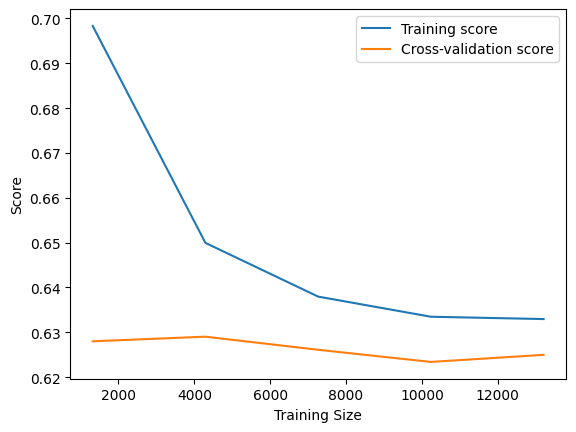

In [31]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, test_scores = learning_curve(prod_end_regressor, X_train, y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

<Axes: >

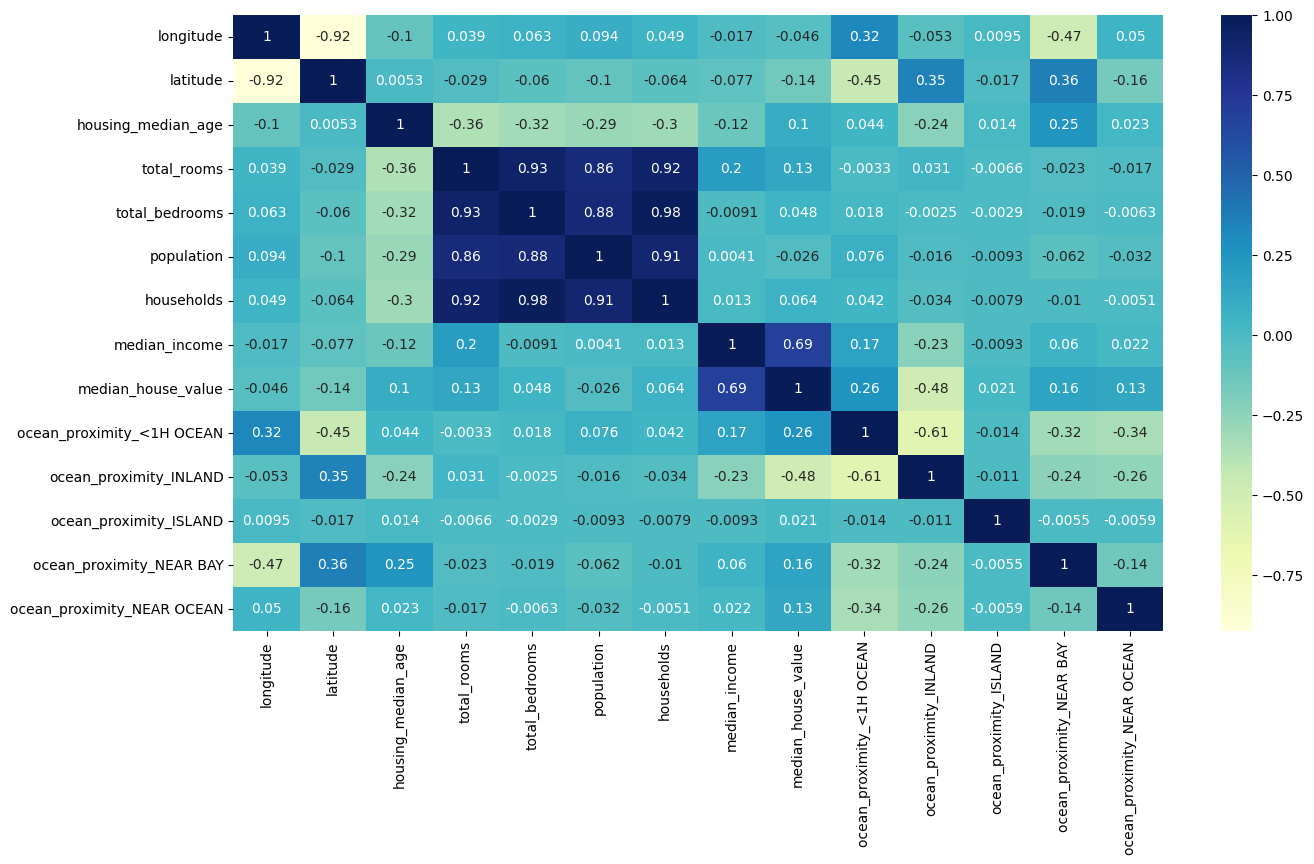

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(solid_train_way.corr(), annot=True, cmap="YlGnBu")